In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans
sns.set()
%matplotlib inline

In [92]:
raw_data = pd.read_csv('iris_dataset.csv')
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [93]:
# check for raw data

raw_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [9]:
# since petal width has smaller range of value it is better to normalize every entry
raw_data['petal_width'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

In [10]:
raw_data['petal_length'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [11]:
raw_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
# let us. normalize the weights as all the entries are equally important

x = preprocessing.scale(raw_data)

In [99]:
# using kmeans algo on standarized features:
wcss=[]
cluster = []
for i in range(1,6):
    kmeans = KMeans(i)
    kmeans.fit(x)
    cluster.append(kmeans.fit_predict(x))
    wcss.append(kmeans.inertia_)

In [100]:
wcss

[600.0000000000003,
 223.73200573676343,
 141.15417813388655,
 114.38954350297055,
 91.06677122728537]

In [101]:
cluster[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [102]:
def plot_elbow():
    range_clusters = range(1,6)
    plt.plot(range_clusters,wcss)
    plt.xlabel('Number of cluster')
    plt.ylabel('Within cluster sum of squares')
    plt.show()

In [103]:
# # when k=1

# data_cluster = raw_data
# data_cluster['cluster']=cluster[1]
# data_cluster

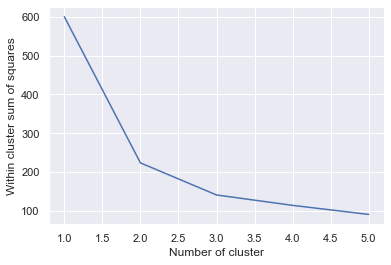

In [104]:
plot_elbow()

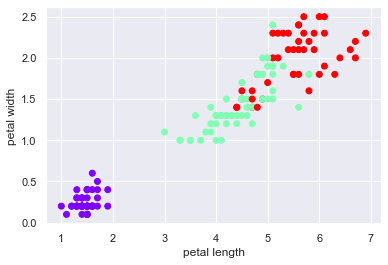

In [105]:
## seems like there 3 cluster will be resonable to plot:
# clustering according to petal_length and petl_width
# cluster 3 is stored is cluster[2] 

n_clus = 3
data_cluster = raw_data.copy()
data_cluster['cluster']=cluster[2]
plt.scatter(raw_data['petal_length'],raw_data['petal_width'],c=data_cluster['cluster'],cmap='rainbow')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

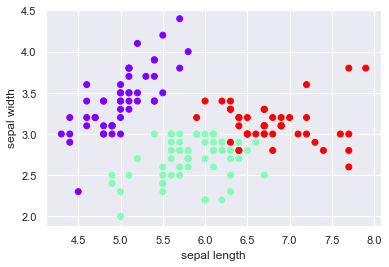

In [106]:
## seems like there 3 cluster will be resonable to plot:
# clustering according to petal_length and petl_width

n_clus = 3
data_cluster = raw_data.copy()
data_cluster['cluster']=cluster[2]
plt.scatter(raw_data['sepal_length'],raw_data['sepal_width'],c=data_cluster['cluster'],cmap='rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

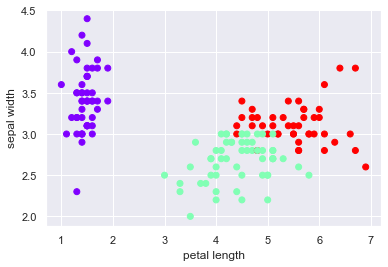

In [107]:
## seems like there 3 cluster will be resonable to plot:
# clustering according to petal_length and sepal_width

n_clus = 3
data_cluster = raw_data.copy()
data_cluster['cluster']=cluster[2]
plt.scatter(raw_data['petal_length'],raw_data['sepal_width'],c=data_cluster['cluster'],cmap='rainbow')
plt.xlabel('petal length')
plt.ylabel('sepal width')
plt.show()

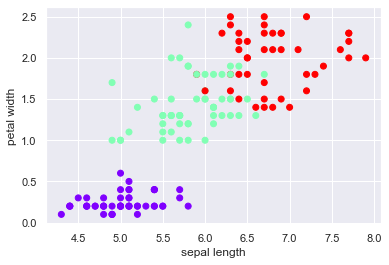

In [108]:
## seems like there 3 cluster will be resonable to plot:
# clustering according to sepal_length and petal_width

n_clus = 3
data_cluster = raw_data.copy()
data_cluster['cluster']=cluster[2]
plt.scatter(raw_data['sepal_length'],raw_data['petal_width'],c=data_cluster['cluster'],cmap='rainbow')
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.show()

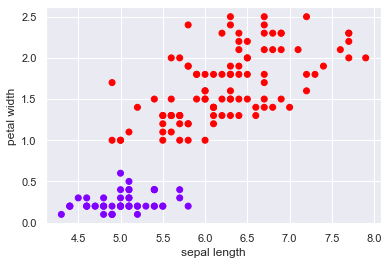

In [109]:
### let us take 2 cluster and replot the data
n_clus = 2
data_cluster = raw_data.copy()
data_cluster['cluster']=cluster[n_clus-1]
plt.scatter(raw_data['sepal_length'],raw_data['petal_width'],c=data_cluster['cluster'],cmap='rainbow')
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.show()


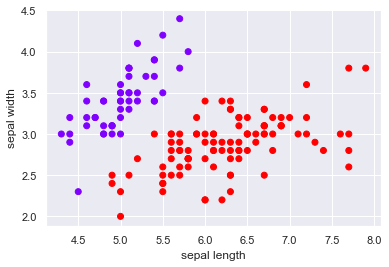

In [110]:
### let us take 2 cluster and replot the data
n_clus = 2
data_cluster = raw_data.copy()
data_cluster['cluster']=cluster[n_clus-1]
plt.scatter(raw_data['sepal_length'],raw_data['sepal_width'],c=data_cluster['cluster'],cmap='rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


In [94]:
### let us try without standarising the data

x_normal = raw_data
x_normal.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [95]:
# using kmeans algo on normal features wihtout standarization:
wcss=[]
cluster = []
for i in range(1,6):
    kmeans = KMeans(i)
    kmeans.fit(x_normal)
    cluster.append(kmeans.fit_predict(x_normal))
    wcss.append(kmeans.inertia_)

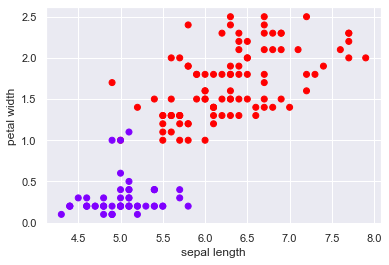

In [96]:
# sepal_length vs petal_width
n_clus = 2
data_cluster = raw_data.copy()
data_cluster['cluster']=cluster[n_clus-1]
plt.scatter(raw_data['sepal_length'],raw_data['petal_width'],c=data_cluster['cluster'],cmap='rainbow')
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.show()

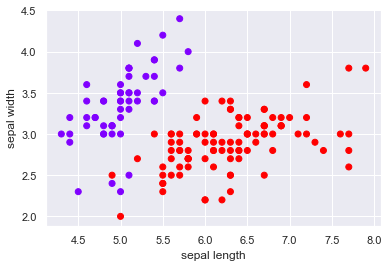

In [97]:
# sepal length vs sepal width
n_clus = 2
data_cluster = raw_data.copy()
data_cluster['cluster']=cluster[n_clus-1]
plt.scatter(raw_data['sepal_length'],raw_data['sepal_width'],c=data_cluster['cluster'],cmap='rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()